In [1]:
import numpy as np
import matplotlib.pyplot as plt

W1 = np.random.randn(3,2) 
B1 = np.random.randn(3)
W2 = np.random.randn(1,3)
B2 = np.random.randn(1)

# training data (X is the input values and Z is the expected output for XOR)
X = np.random.randint(2, size=[50,2])
Z = np.array([X[:,0]^X[:, 1]]).T # shown as y_hat in derivation

### why different dimensions of weights?

depends on the nodes 
(i.e. for weights
1st layer (hidden) is (3,2) because it connects 3 sigmoid nodes for 2 inputs (1 or 0)
2nd layer is (1,3) as it is reduced to 1 sigmoid node for the 3 inputs (outputs from prior layer)
for bias, B1 has 3 numbers for its corresponding weights and B2 has 1 for the second layer (shown in diagram below)
)

In [2]:
# sigmoid function
def sigm(X, W, B):
    M = 1/(1+np.exp(-(X.dot(W.T)+B)))
    return M

# feed forward equation
def Forward(X, W1, B1, W2, B2):
    # first layer (hidden layer)
    H = sigm(X,W1,B1)
    # second layer (final layer)
    Y = sigm(H,W2,B2)
    return Y, H

![](img/lab2/diagram.jpeg)

In [3]:
def diff_B2(Z, Y): # Z (Actual Output), Y (Calculated Output)
    dB = (Z-Y)*Y*(1-Y)
    return dB.sum(axis=0)

def diff_W2(H, Z, Y): # H (Hidden Layer Output, Input for this layer)
    dW = (Z-Y)*Y*(1-Y)
    return H.T.dot(dW)

def diff_B1(Z, Y, W2, H): # W2 (Weights)
    return ((Z-Y).dot(W2)*Y*(1-Y)*H*(1-H)).sum(axis=0)

def diff_W1(X, H, Z, Y, W2): # X (Initial Input)
    dZ = (Z-Y).dot(W2)*Y*(1-Y)*H*(1-H)
    return X.T.dot(dZ)

### how to derive diff_w2, diff_w1, diff_b2, diff_b1?
![](img/lab2/derivation.jpeg)

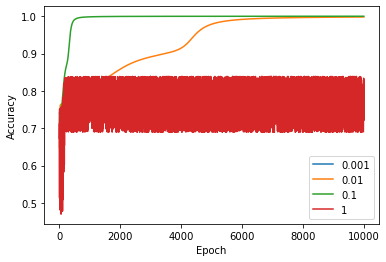

In [13]:
learning_rate_set = [0.001, 0.01, 0.1, 1] # test with multiple learning rates
epoch_val = 10000 # epoch is the number of iterations
leg = [] # initialise empty legend
for i in range(len(learning_rate_set)):
    
    # select learning rate
    learning_rate = learning_rate_set[i]
    
    # add to legend for plotting
    leg.append(learning_rate)
    
    # resetting weights and biases to compare with different learning rates
    W1 = np.random.randn(3,2)
    B1 = np.random.randn(3)
    W2 = np.random.randn(1,3)
    B2 = np.random.randn(1)
    
    Accuracy_set = [] # initialise empty set for plotting
    
    # print('================= Learning Rate: ', learning_rate, ' ===========================')
    
    for epoch in range(epoch_val):
        Y, H = Forward(X, W1, B1, W2, B2) # run feedforward equation to get output of hidden layer and overall
        
        # backpropagation
        W2 += learning_rate * diff_W2(H,Z,Y).T
        B2 += learning_rate * diff_B2(Z,Y)
        W1 += learning_rate * diff_W1(X,H,Z,Y,W2).T
        B1 += learning_rate * diff_B1(Z, Y, W2, H)
        
        if not epoch %50: # print calculated accuracy every 50 iterations
            Accuracy = 1 - np.mean((Z-Y)**2)
            # print('Epoch: ', epoch, ' Accuracy: ', Accuracy)
            
        # plotting    
        Accuracy_set.append(1-np.mean((Z-Y)**2))
    plt.plot(range(epoch_val), Accuracy_set)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(leg)
plt.show()

### Softmax Function

![](img/lab2/softmax.png)

The softmax function is used for classification functions, rescaling the output to range [0,1] with the sum as 1, so that the output is set as a probability.

Softmax is commonly used as the final activation function for multi-class classification tasks, the predicted class is then the one with the highest probability in the output distribution. It is used in accordance with the cross-entropy function.

### Cross-Entropy Function

![](img/lab2/crossentropy.png)

Loss function alongside the softmax. Measures the performance of a classification model, whose output is a probability value between 0 and 1. A perfect model would have a loss of 0.

![](img/lab2/soft-cross-backprop.png)

As shown above, they fit perfectly together, making the equation for backpropagation simple to write for B2 and W2.

### Including Softmax and Cross-entropy Function for XOR

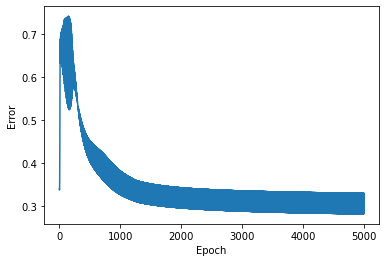

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# X is the input, Y is the expected output
X = np.vstack([(np.random.rand(1000,2)*5), (np.random.rand(1000,2)*10)])
Y = np.hstack([([0]*1000), [1]*1000])

# use cross entropy loss function and softmax activation function,
# assign values to Z on the basis of Y as 'one hot vector': 1 or 0
Z = np.zeros((2000,2))

for i in range(2000):
    Z[i, Y[i]] = 1

# define random intial weights
W1 = np.random.randn(3,2)
B1 = np.random.randn(3)
W2 = np.random.randn(2,3)
B2 = np.random.randn(2)

def Forward(X, W1, B1, W2, B2):
    H = 1/(1+np.exp(-(X.dot(W1.T)+B1))) # output w sigmoid layer
    # second layer, output (softmax operator)
    A = H.dot(W2.T)+B2
    expA = np.exp(A)
    Y = expA/expA.sum(axis = 1, keepdims = True)
    # return final output and hidden layer 
    return Y, H

def diff_W2(H, Z, Y): # Y is the true output, Z is the output of the output layer
    return H.T.dot(Z-Y)
def diff_W1(X, H, Z, Y, W2):
    dZ = (Z-Y).dot(W2)*H*(1-H)
    return X.T.dot(dZ)
def diff_B2(Z, Y):
    return (Z-Y).sum(axis=0)
def diff_B1(Z, Y, W2, H):
    return ((Z-Y).dot(W2)*H*(1-H)).sum(axis=0)

learning_rate = 0.001
Error = []

for epoch in range(5000):
    Output, H = Forward(X, W1, B1, W2, B2)
    W2 += learning_rate * diff_W2(H, Z, Output).T
    B2 += learning_rate * diff_B2(Z, Output)
    W1 += learning_rate * diff_W1(X, H, Z, Output, W2).T
    B1 += learning_rate * diff_B1(Z, Output, W2, H)
    # cross-entropy function
    Error.append(np.mean(-Z*np.log(Output)))
plt.plot(range(5000), Error)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

### Lab Oral Preparation

##### Question ) Why does the learning rate need to be tuned? What are the consequences of having it too high/low?

The learning rate is a hyperparameter, used to determine the magnitude of the step when updating the model's parameters, weights and biases.

When the learning rate is too high, it can oscillate around the local minimum, and overshoot the optimal value.
When the learning rate is too low, the value can 'get stuck' in the local optimum, and never converge at the optimal value. Furthermore, the epoch would have to be higher even if the value doesn't get stuck to reach the optimal value.

##### Question ) What is Gradient Descent?
Gradient Descent is an optimisation algorithm used to minimize the value of the cost function by taking steps in the direction of the steepest decrease of the cost function wrt to the model's parameter.

There are several variations: stomachstic gradient descent (SGD) and adaptive methods such as Adam which makes use of additional techniques to improve convergence and speed up the optimisation process. 

SGD is a simpler alg that is generally computationally less expensive than adaptive methods and easier to tune. SGD uses the gradient of the loss function to update the model parameter, whereas Adam takes into account the gradients computed on a larger set of examples. SGD is more susceptible to noisy or sparse gradients.

SGD is preferred with smaller dataset and when the objective is to avoid overfitting, as SGD can converge to flatter minima than adaptive methods like Adam.

Choice of optimisation alg depends on several factors: size of dataset, complexity of model, desired converge speed and accuracy. It is often an interative trial and error process to find the best combination of alg and learning rates for a particular problem.

##### Question ) Derivation of B2 and W2 for Backpropagation when usig softmax and cross-entropy loss function?
Diff_W2 includes the derivative of the loss function wrt input to the output layer (Z-Y) and the deriative of the input to the output layer wrt the weights (H.T)
Diff_B2 includes the derivative of the loss function wrt input to the output layer (Z-Y) and the deriative of the input to the output layer wrt the bias (1)

##### Question) What is the difference between using Sigmoid and Softmax for the output layer?

Sigmoid is a smooth continuous function that maps the input to a value between 0 and 1, suitable for binary problems where the goal is to predict the probability of belonging to a certain class. It is not fit for when there are more than two possible classes; whereas, Softmax can handle multiple classes, where a probability is distributed such that the sum is equal to 1. Another difference is non-exclusivity, sigmoid can assign a probability of belonging to both classes, whereas Softmax can only assign a probability of belonging to one class.

Softmax can be used for multi-class classification, Sigmoid is used for binary classification problems.

##### Question ) Explain the Operation of the Following Code
Make sure to understand each parts of the code.